# Neural Network - Backpropagation

## Terminology

$ s_l $ : no of nodes in layer $ l $  
$ a^{(l)} $ : activation nodes for layer $ l $ , has dimension $ [m \times (s_{l}+1)] $ including the bias unit  
$ \Theta^{(l)} $ : weights for layer $ l $, has dimension $ [ (s_{l}+1) \times s_{l+1} ] $  
$ K $ : No of Output Units  
$ L $ : No of Layers

$ a^{(1)} = X = $ input layer - $ [m \times (n+1)] $   
$ \Theta^{(2)} $ - $ [s_2 \times (n+1)] $

$ a^{(2)} = g(a^{(1)}. {\Theta^{(2)}}^T ) $ - $  [m \times (s_2)] $  ( add ($ a^{(2)}_0 $) )  


and so on...

## Cost Function
$$ J(\Theta) = - \frac{1}{m} [ \sum^{m}_{i=1} \sum^{K}_{k = 1} y_{i k} log(h_{\theta} (x_i)_k ) + (1- y_{i k}) log(1- h_{\theta} (x_i)_k )] + \frac{\lambda}{2m} \sum^{L}_{l=2} \sum^{s_l}_{i=1} \sum^{s_{l+1}}_{j=1} (\Theta^{(l)}_{ij})^2  $$

## Gradient Function
For $ L = 4$ $, s_1 = 3$, $s_2 = 5$, $s_3 = 5$, $s_4 = K = 4 $  

$ \delta^{(l)}_{j} :$ "error" in the activation of node $ j$ in layer $l$  

$ \delta^{(4)} = a^{(4)} - y $ - has dimensions $[m \times s_4]$  

$ \delta^{(3)} =  \delta^{(4)} (\Theta^{(4)})^T .* g'(z^{(4)}) $ - has dimensions $[m \times s_4]$  
where, $ g'(z^{(4)}) = g(z^{(4)}) .* (1 - g(z^{(4)})) $  

Therefore,  
$ \delta^{(4)} =  \delta^{(4)} (\Theta^{(4)})^T .* a^{(4)} .* (1 - a^{(4)} )  $  

and so on...

In [1]:
import numpy as np
import scipy.optimize as op
import scipy.io as sio
import matplotlib.pyplot as plt

In [29]:
data = sio.loadmat('Practice\Machine Learning\machine-learning-ex4\ex4\ex4data1.mat')
X = data['X']
X = np.insert(arr=X, obj=0, values=1.0, axis=1)
y = data['y']
m, n = X.shape
K = 10
lbd = 1
Y = np.zeros((m, 10))
# saving no of neurons in s
S = [400, 25, 10]   # excluding bias
# for predicting digit = 0, we get h high as index 9 (0 based)
# therefore we create Y as
# [1, 0, 0, ... 0] for 1
# [0, 1, 0, ... 0] for 2
# [0, 0, 0, ... 1] for 0
for i in range(1, K+1):
    Y[np.where(y == i)[0], i-1] = 1

In [30]:
def sigmoid(Z):
    return 1/(1+ 1/(np.e**Z))

In [31]:
def predict(thetas, X, S):
    m, n = X.shape
    
    theta1 = thetas[:(S[0]+1)*S[1]]
    theta2 = thetas[(S[0]+1)*S[1]:]
    theta1 = theta1.reshape((S[1], S[0]+1))    # 25 x 401
    theta2 = theta2.reshape((S[2], S[1]+1))    # 10 x 26

    theta1 = theta1.T       # n x 25
    theta2 = theta2.T       # 26 x 10
    Z2 = X.dot(theta1)      # M x 25
    A2 = sigmoid(Z2)        
    A2 = np.insert(arr=A2, obj=0, values=1.0, axis=1)   # M x 26
    # print(A2.shape)
    Z3 = A2.dot(theta2)
    A3 = sigmoid(Z3)        # M X 10
    # print(A3.shape)

    # choose column wise max index for each example
    # np.amax(A3, 1) gives each rows max values in an array
    # np.amax(A3, 1) gives each columns max values in an array

    # np.amax().reshape() make that a column vector
    # np.where(A3 = ... ) gives two arrays:
    # 1. Indices of rows for each match
    # 2. Indices of columns for each match
    # if an element doesn't match, it is ignored
    # we only want the indices of columns
    return np.where(A3 == np.amax(A3, axis=1).reshape((m, 1)) )[1].reshape(m, 1)+1


In [32]:
# np.where( H == np.amax(H, axis=1).reshape((m, 1)) )[1]
# thetas = 3d matrix where thetas[0] = theta matrix for layer 1
# y = m x 10 shaped matrix
def costFunc(thetas, X, Y, lbd, S):
    m, n = X.shape
    Y = Y.reshape((m, S[2]))

    # print(thetas.shape)
    theta1 = thetas[:(S[0]+1)*S[1]]
    theta2 = thetas[(S[0]+1)*S[1]:]
    theta1 = theta1.reshape((S[1], S[0]+1))    # 25 x 401
    theta2 = theta2.reshape((S[2], S[1]+1))    # 10 x 26

    theta1 = theta1.T       # n x 25
    theta2 = theta2.T       # 26 x 10
    Z2 = X.dot(theta1)      # M x 25
    A2 = sigmoid(Z2)        
    A2 = np.insert(arr=A2, obj=0, values=1.0, axis=1)   # M x 26
    Z3 = A2.dot(theta2)
    A3 = sigmoid(Z3)        # M X 10

    # cost = -1/m*np.sum(Y*np.log(A3)+(1-Y)*np.log(1-A3))
    cost = 1/(2*m)*np.sum((A3-Y)**2)
    cost += lbd /(2*m) * (np.sum(theta1[1:, :]**2) + np.sum(theta2[1:, :]**2) )
    # print(cost)

    return cost

## Backpropagation

In [33]:
def sigmoidGrad(Z):
    p = sigmoid(Z)
    return p*(1-p)

In [34]:
def gradFunc(thetas, X, Y, lbd, S):
    m, n = X.shape
    Y = Y.reshape((m, S[2]))
    
    theta1 = thetas[:(S[0]+1)*S[1]]
    theta2 = thetas[(S[0]+1)*S[1]:]
    theta1 = theta1.reshape((S[1], S[0]+1))    # 25 x 401
    theta2 = theta2.reshape((S[2], S[1]+1))    # 10 x 26

    Z2 = X.dot(theta1.T)      # M x 25
    A2 = sigmoid(Z2)
    A2 = np.insert(arr=A2, obj=0, values=1.0, axis=1)   # M x 26
    Z3 = A2.dot(theta2.T)
    A3 = sigmoid(Z3)        # M X 10

    error3 = A3-Y         # M x 10
    temp3 = error3 * sigmoidGrad(Z3)        # M x 10
    grad3 = 1/m* error3.T.dot(A2)             # 10 * 26
    # grad3 = 1/m*temp3.T.dot(A2)             # 10 * 26
    grad3[:, 1:] += (lbd/m)*theta2[:, 1:]

    error2 = error3.dot(theta2[:, 1:])       # M x 25
    # error2 = temp3.dot(theta2[:, 1:])       # M x 25
    temp2 = error2 * sigmoidGrad(Z2)
    grad2 = 1/m*temp2.T.dot(X)              # 25 x 401
    grad2[:, 1:] += (lbd/m)*theta1[:, 1:]

    return np.array(np.append(grad2, grad3) ).reshape((10285, 1))

In [36]:
test_thetas = sio.loadmat('Practice\Machine Learning\machine-learning-ex4\ex4\ex4weights.mat')
test_thetas = np.array(np.append(test_thetas['Theta1'], test_thetas['Theta2']) )
test_thetas=test_thetas.reshape((10285, 1))
test_result = predict(test_thetas, X, S)
acc = test_result[test_result==y].size/m*100
cost = costFunc(test_thetas, X, Y, lbd, S)
grad = gradFunc(test_thetas, X, Y, lbd, S)
print(cost, acc)

0.12660688219264263 97.52


In [44]:
def randInitWeights(S):
    import numpy.random as random
    t1 = random.rand(S[1], S[0]+1)/10
    t2 = random.rand(S[2], S[1]+1)/10
    return np.array(np.append(t1, t2)).reshape((10285, 1))

In [45]:
thetas = randInitWeights(S)
thetas

array([[0.08901158],
       [0.06413426],
       [0.07916808],
       ...,
       [0.06321095],
       [0.08509999],
       [0.04424475]])

In [48]:
opt = {'maxiter':500}
temp = op.minimize(fun=costFunc, x0=thetas,
                jac=gradFunc, args=(X, Y, 1, S), 
                method='TNC', options=opt )
temp

     fun: 0.17705575324455297
     jac: array([[-3.69876369e-03],
       [ 8.61064216e-06],
       [ 1.04994491e-05],
       ...,
       [-2.81670905e-04],
       [ 1.80337350e-04],
       [-6.02042087e-04]])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 201
     nit: 19
  status: 1
 success: True
       x: array([ 0.29506661,  0.04305321,  0.05249725, ...,  0.50122868,
       -0.67929756,  1.66067546])

In [49]:
print(test_thetas)
test_result = predict(temp.x, X, S)
y[test_result==y].size/m*100

[[-2.25623899e-02]
 [-1.05624163e-08]
 [ 2.19414684e-09]
 ...
 [-2.47795788e-01]
 [ 1.28009118e+00]
 [-1.32752042e+00]]


91.86

# Using sklearn

In [2]:
data = sio.loadmat('Practice\Machine Learning\machine-learning-ex4\ex4\ex4data1.mat')
X = data['X']
X = np.insert(arr=X, obj=0, values=1.0, axis=1)
y = data['y']
y2 = y.ravel()

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
clf = MLPClassifier(hidden_layer_sizes=(20, ), max_iter=50)
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.30, random_state=42)

In [4]:
clf.fit(X_train, y_train)

C:\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [6]:
y_pre = clf.predict(X_test)
m = y_test.size
acc = y_test[y_pre==y_test].size/m*100
print(acc)

91.60000000000001


In [11]:
from sklearn.metrics import confusion_matrix
def plotConfusionMatrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    '''
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    '''
    if not title:
        title = 'Confusion Matrix'
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, 
           yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax

[[145   1   0   0   2   0   0   4   0   0]
 [  1 132   6   6   1   1   0   8   0   0]
 [  0   4 136   1   5   1   2   4   1   0]
 [  0   3   0 126   0   1   1   4   7   1]
 [  1   1   8   3 126   0   0   2   0   0]
 [  0   0   0   1   2 137   0   1   0   2]
 [  2   2   0   2   0   1 144   1   5   1]
 [  2   2   1   0   4   1   0 120   1   1]
 [  0   0   1   3   1   1   5   0 145   2]
 [  0   0   0   0   0   0   0   0   1 163]]


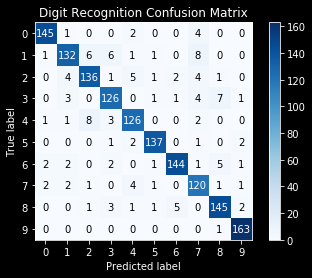

In [12]:
ax = plotConfusionMatrix(y_test, y_pre, 
        classes=[i for i in range(10)], 
        title='Digit Recognition Confusion Matrix')
plt.show()